In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/car-price/CarPrice_Assignment.csv
/kaggle/input/car-price/Data Dictionary - carprices.xlsx


Reading the Data

In [2]:
cars=pd.read_csv('/kaggle/input/car-price/CarPrice_Assignment.csv')
cars.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
141,142,0,subaru,gas,std,four,sedan,fwd,front,97.2,...,108,2bbl,3.62,2.64,9.5,82,4800,32,37,7126.0
140,141,2,subaru dl,gas,std,two,hatchback,4wd,front,93.3,...,108,2bbl,3.62,2.64,8.7,73,4400,26,31,7603.0
184,185,2,volkswagen model 111,diesel,std,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.40,23.0,52,4800,37,46,7995.0
44,45,1,isuzu D-Max,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,8916.5
126,127,3,porcshce panamera,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,32528.0


Performing Basic Data Investigation

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
col=['car_ID']
cars.drop(columns=col,inplace=True)
cars.sample(5)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
185,2,volkswagen type 3,gas,std,four,sedan,fwd,front,97.3,171.7,...,109,mpfi,3.19,3.40,9.0,85,5250,27,34,8195.0
37,0,honda accord,gas,std,two,hatchback,fwd,front,96.5,167.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,7895.0
117,0,peugeot 604sl,gas,turbo,four,sedan,rwd,front,108.0,186.7,...,134,mpfi,3.61,3.21,7.0,142,5600,18,24,18150.0
145,0,subaru r2,gas,turbo,four,sedan,4wd,front,97.0,172.0,...,108,mpfi,3.62,2.64,7.7,111,4800,24,29,11259.0
22,1,dodge challenger se,gas,std,two,hatchback,fwd,front,93.7,157.3,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6377.0


In [5]:
cars.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
cars.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
categorical=cars.select_dtypes(include='object')
values=cars.select_dtypes(exclude='object')
categorical.sample(5)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
46,isuzu D-Max,gas,std,two,hatchback,rwd,front,ohc,four,spfi
41,honda civic,gas,std,four,sedan,fwd,front,ohc,four,mpfi
107,peugeot 504,gas,std,four,sedan,rwd,front,l,four,mpfi
21,dodge rampage,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
117,peugeot 604sl,gas,turbo,four,sedan,rwd,front,l,four,mpfi


In [8]:
values.sample(5)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
90,1,94.5,165.3,63.8,54.5,2017,103,2.99,3.47,21.9,55,4800,45,50,7099.0
77,2,93.7,157.3,64.4,50.8,1944,92,2.97,3.23,9.4,68,5500,31,38,6189.0
173,-1,102.4,175.6,66.5,54.9,2326,122,3.31,3.54,8.7,92,4200,29,34,8948.0
185,2,97.3,171.7,65.5,55.7,2212,109,3.19,3.40,9.0,85,5250,27,34,8195.0
123,-1,103.3,174.6,64.6,59.8,2535,122,3.35,3.46,8.5,88,5000,24,30,8921.0


Seprating Numerical and Categorical data into different Lists

In [9]:
categorical['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [10]:
def brandName(carName):
    brand=carName.split(' ')
    return brand[0]

categorical['Brand']=categorical['CarName'].apply(brandName)
cars['Brand']=cars['CarName'].apply(brandName)
categorical.sample(5)


,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,Brand
152,toyota corolla 1200,gas,std,four,hatchback,fwd,front,ohc,four,2bbl,toyota
80,mitsubishi mirage g4,gas,turbo,two,hatchback,fwd,front,ohc,four,spdi,mitsubishi
29,dodge coronet custom (sw),gas,turbo,two,hatchback,fwd,front,ohc,four,mfi,dodge
19,chevrolet monte carlo,gas,std,two,hatchback,fwd,front,ohc,four,2bbl,chevrolet
84,mitsubishi mirage g4,gas,turbo,two,hatchback,fwd,front,ohc,four,spdi,mitsubishi


In [11]:
cars.sample(5)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
66,0,mazda rx-7 gs,diesel,std,four,sedan,rwd,front,104.9,175.0,...,idi,3.43,3.640,22.0,72,4200,31,39,18344.0,mazda
57,3,mazda rx-7 gs,gas,std,two,hatchback,rwd,front,95.3,169.0,...,4bbl,3.33,3.255,9.4,101,6000,17,23,13645.0,mazda
160,0,toyota corona,gas,std,four,sedan,fwd,front,95.7,166.3,...,2bbl,3.19,3.030,9.0,70,4800,38,47,7738.0,toyota
118,1,plymouth fury iii,gas,std,two,hatchback,fwd,front,93.7,157.3,...,2bbl,2.97,3.230,9.4,68,5500,37,41,5572.0,plymouth
83,3,mitsubishi g4,gas,turbo,two,hatchback,fwd,front,95.9,173.2,...,spdi,3.59,3.860,7.0,145,5000,19,24,14869.0,mitsubishi


In [12]:
categorical['Brand'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: Brand, dtype: int64

In [13]:
cars.drop(columns=['CarName'],inplace=True)
categorical.drop(columns=['CarName'],inplace=True)
values.drop(columns=['symboling'],inplace=True)

In [14]:
cars.sample(5)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
25,1,gas,std,four,sedan,fwd,front,93.7,157.3,63.8,...,2bbl,2.97,3.230,9.4,68,5500,31,38,6692.0,dodge
99,0,gas,std,four,hatchback,fwd,front,97.2,173.4,65.2,...,2bbl,3.33,3.470,8.5,97,5200,27,34,8949.0,nissan
50,1,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,...,2bbl,3.03,3.150,9.0,68,5000,30,31,5195.0,maxda
13,0,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,...,mpfi,3.31,3.190,9.0,121,4250,21,28,21105.0,bmw
58,3,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,mpfi,3.33,3.255,9.4,135,6000,16,23,15645.0,mazda


In [15]:
categorical.sample(5)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,Brand
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
98,gas,std,two,hardtop,fwd,front,ohc,four,2bbl,nissan
32,gas,std,two,hatchback,fwd,front,ohc,four,1bbl,honda
62,gas,std,four,sedan,fwd,front,ohc,four,2bbl,mazda
197,gas,std,four,wagon,rwd,front,ohc,four,mpfi,volvo


In [16]:
values.sample(5)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
104,91.3,170.7,67.9,49.7,3071,181,3.43,3.27,9.0,160,5200,19,25,17199.0
141,97.2,172.0,65.4,52.5,2145,108,3.62,2.64,9.5,82,4800,32,37,7126.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0
187,97.3,171.7,65.5,55.7,2319,97,3.01,3.40,23.0,68,4500,37,42,9495.0


In [17]:
categorical['Brand'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: Brand, dtype: int64

In [18]:
values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    int64  
 5   enginesize        205 non-null    int64  
 6   boreratio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    int64  
 10  peakrpm           205 non-null    int64  
 11  citympg           205 non-null    int64  
 12  highwaympg        205 non-null    int64  
 13  price             205 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 22.5 KB


In [19]:
categorical['Brand'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: Brand, dtype: int64

Cleaning the Data

In [20]:
brand=categorical['Brand'].value_counts()
brand=brand[brand<=6]
brand

saab           6
isuzu          4
porsche        4
alfa-romero    3
chevrolet      3
jaguar         3
vw             2
maxda          2
renault        2
toyouta        1
vokswagen      1
Nissan         1
mercury        1
porcshce       1
Name: Brand, dtype: int64

In [21]:
def brandClassify(b):
    if b in brand:
        return 'others'
    else:
        return b
    
categorical['Brand']=categorical['Brand'].apply(brandClassify)

In [22]:
categorical['Brand'].value_counts()

others        34
toyota        31
nissan        17
mazda         15
honda         13
mitsubishi    13
subaru        12
peugeot       11
volvo         11
dodge          9
volkswagen     9
bmw            8
buick          8
audi           7
plymouth       7
Name: Brand, dtype: int64

<Axes: >

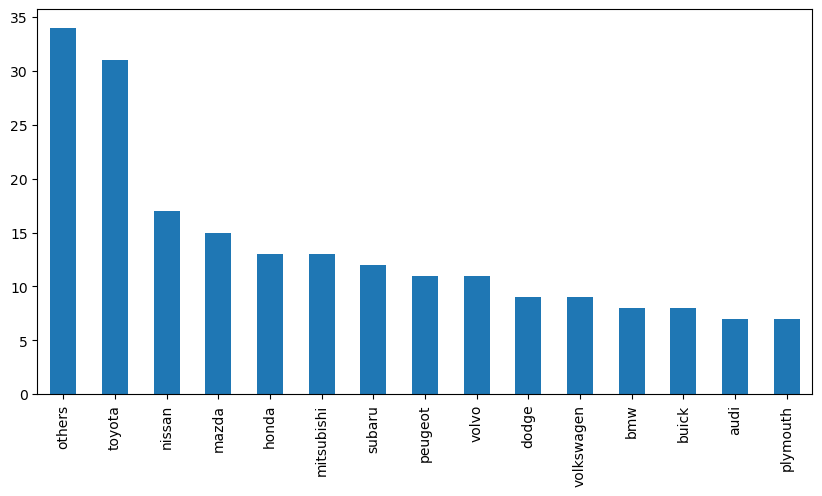

In [23]:
plt.figure(figsize=(10, 5))
categorical['Brand'].value_counts().plot(kind='bar')

In [24]:
category_values=list(categorical)
category_values

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'Brand']

Performing Exploratory Data Analysis

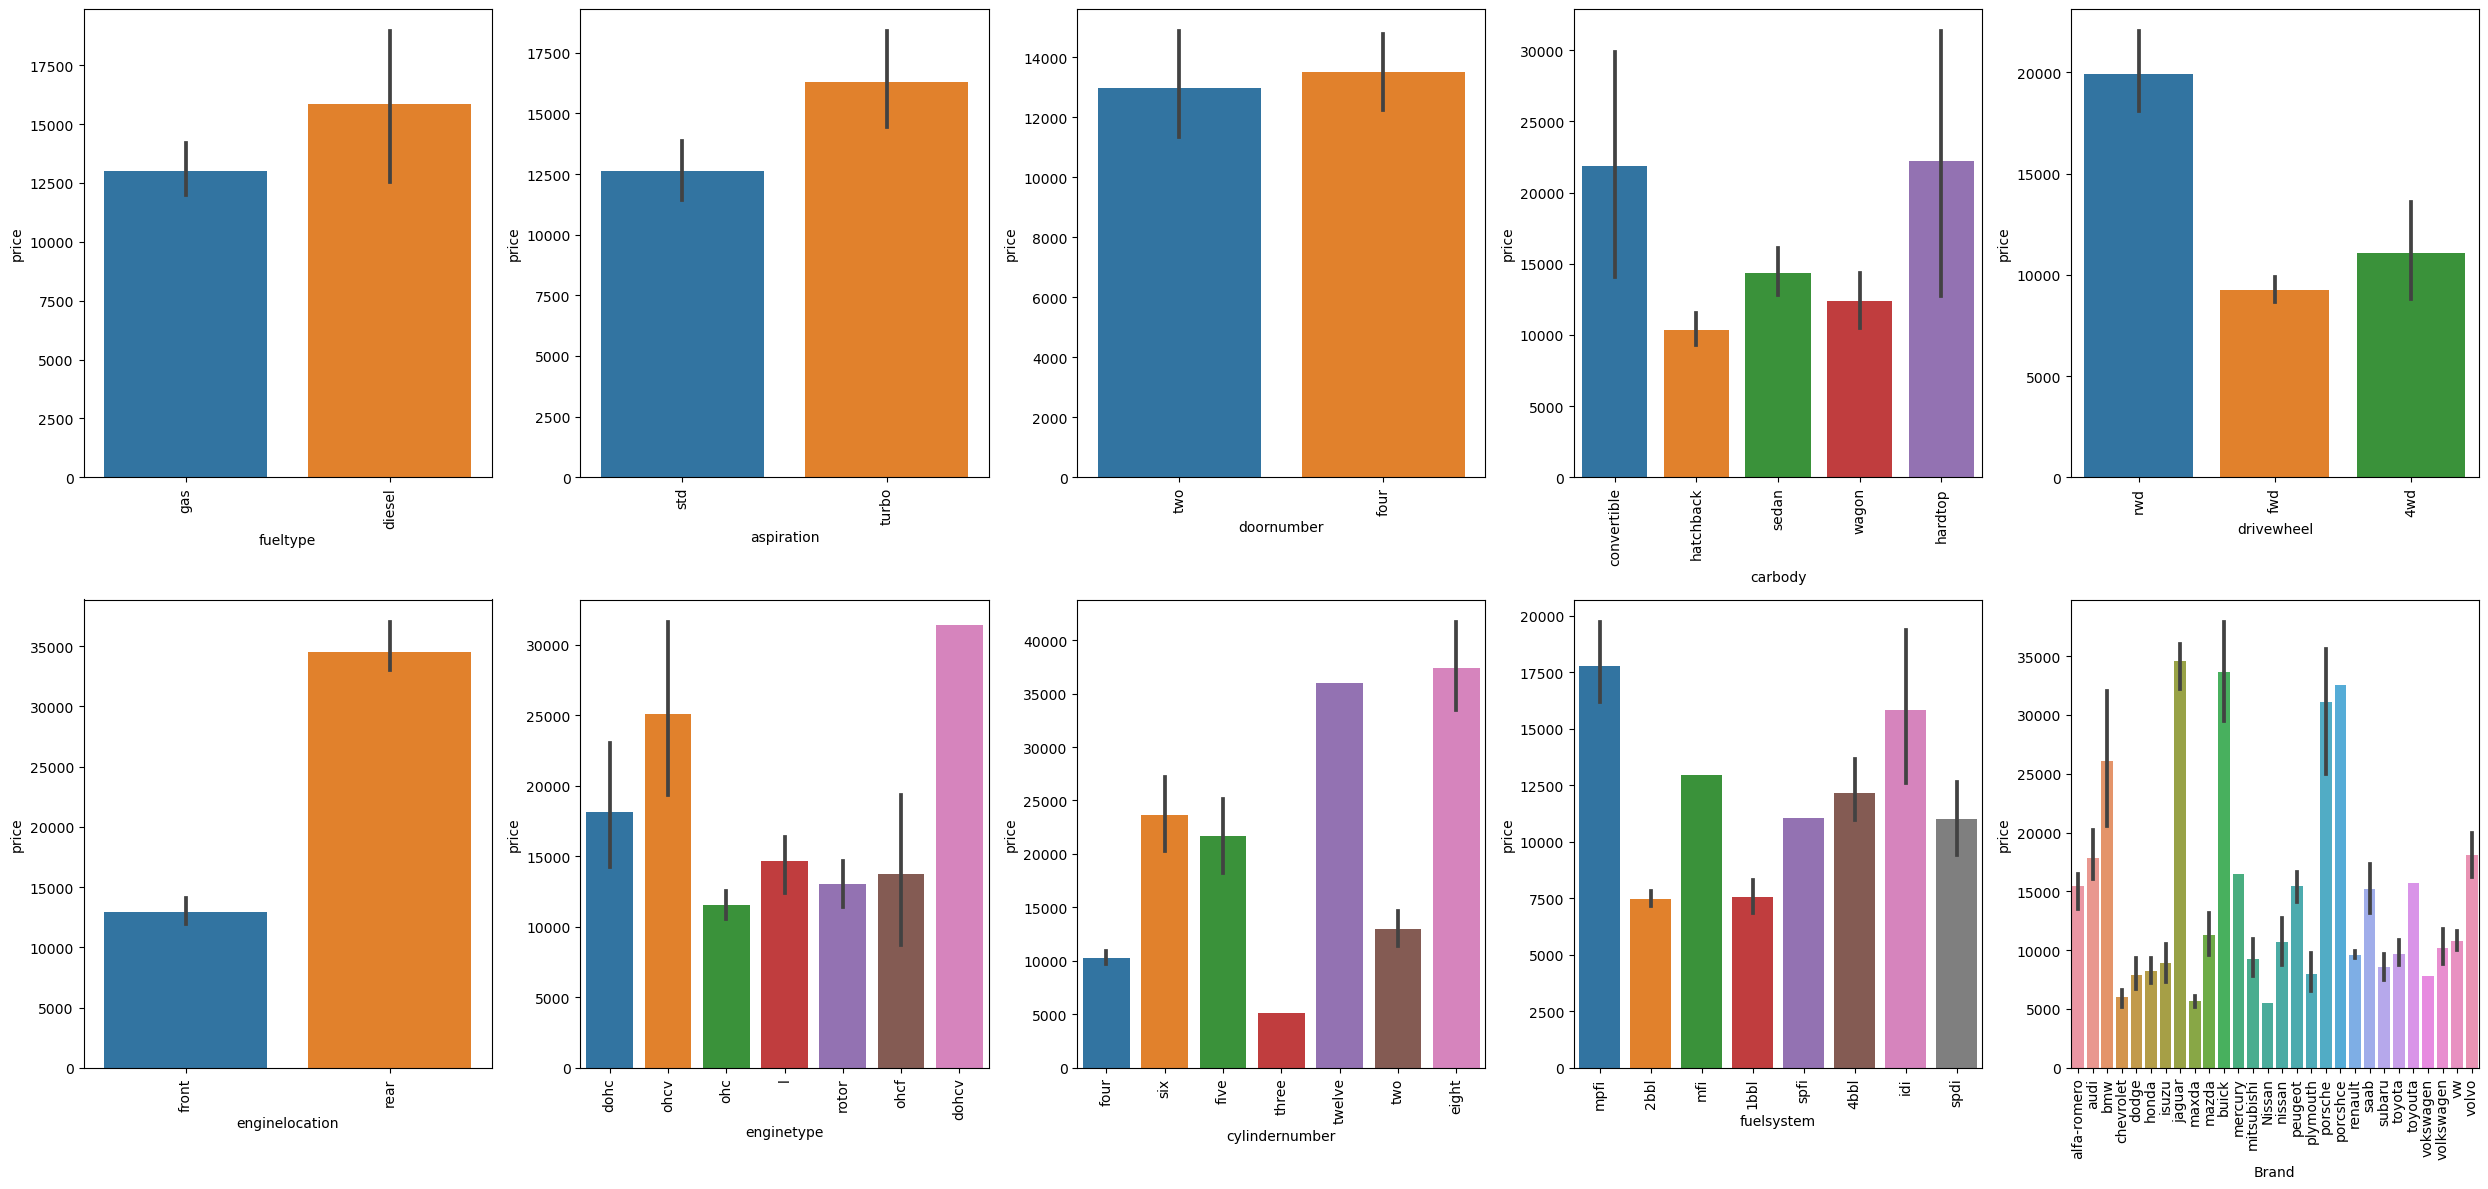

In [25]:
fig, axs=plt.subplots(nrows=2, ncols=5,figsize=(25,12))
axs.ravel()

for i, var in enumerate(category_values):
    sns.barplot(data=cars, x=var, y='price', ax=axs[i//5][i%5])
    axs[i//5][i%5].set_xticklabels(axs[i//5][i%5].get_xticklabels(), rotation=90)
    
fig.tight_layout()
plt.show()

/tmp/ipykernel_20/655429338.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts=cat_counts_top.append(cat_counts_other)
/tmp/ipykernel_20/655429338.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts=cat_counts_top.append(cat_counts_other)
/tmp/ipykernel_20/655429338.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts=cat_counts_top.append(cat_counts_other)
/tmp/ipykernel_20/655429338.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts=cat_counts_top.append(cat_counts_other)


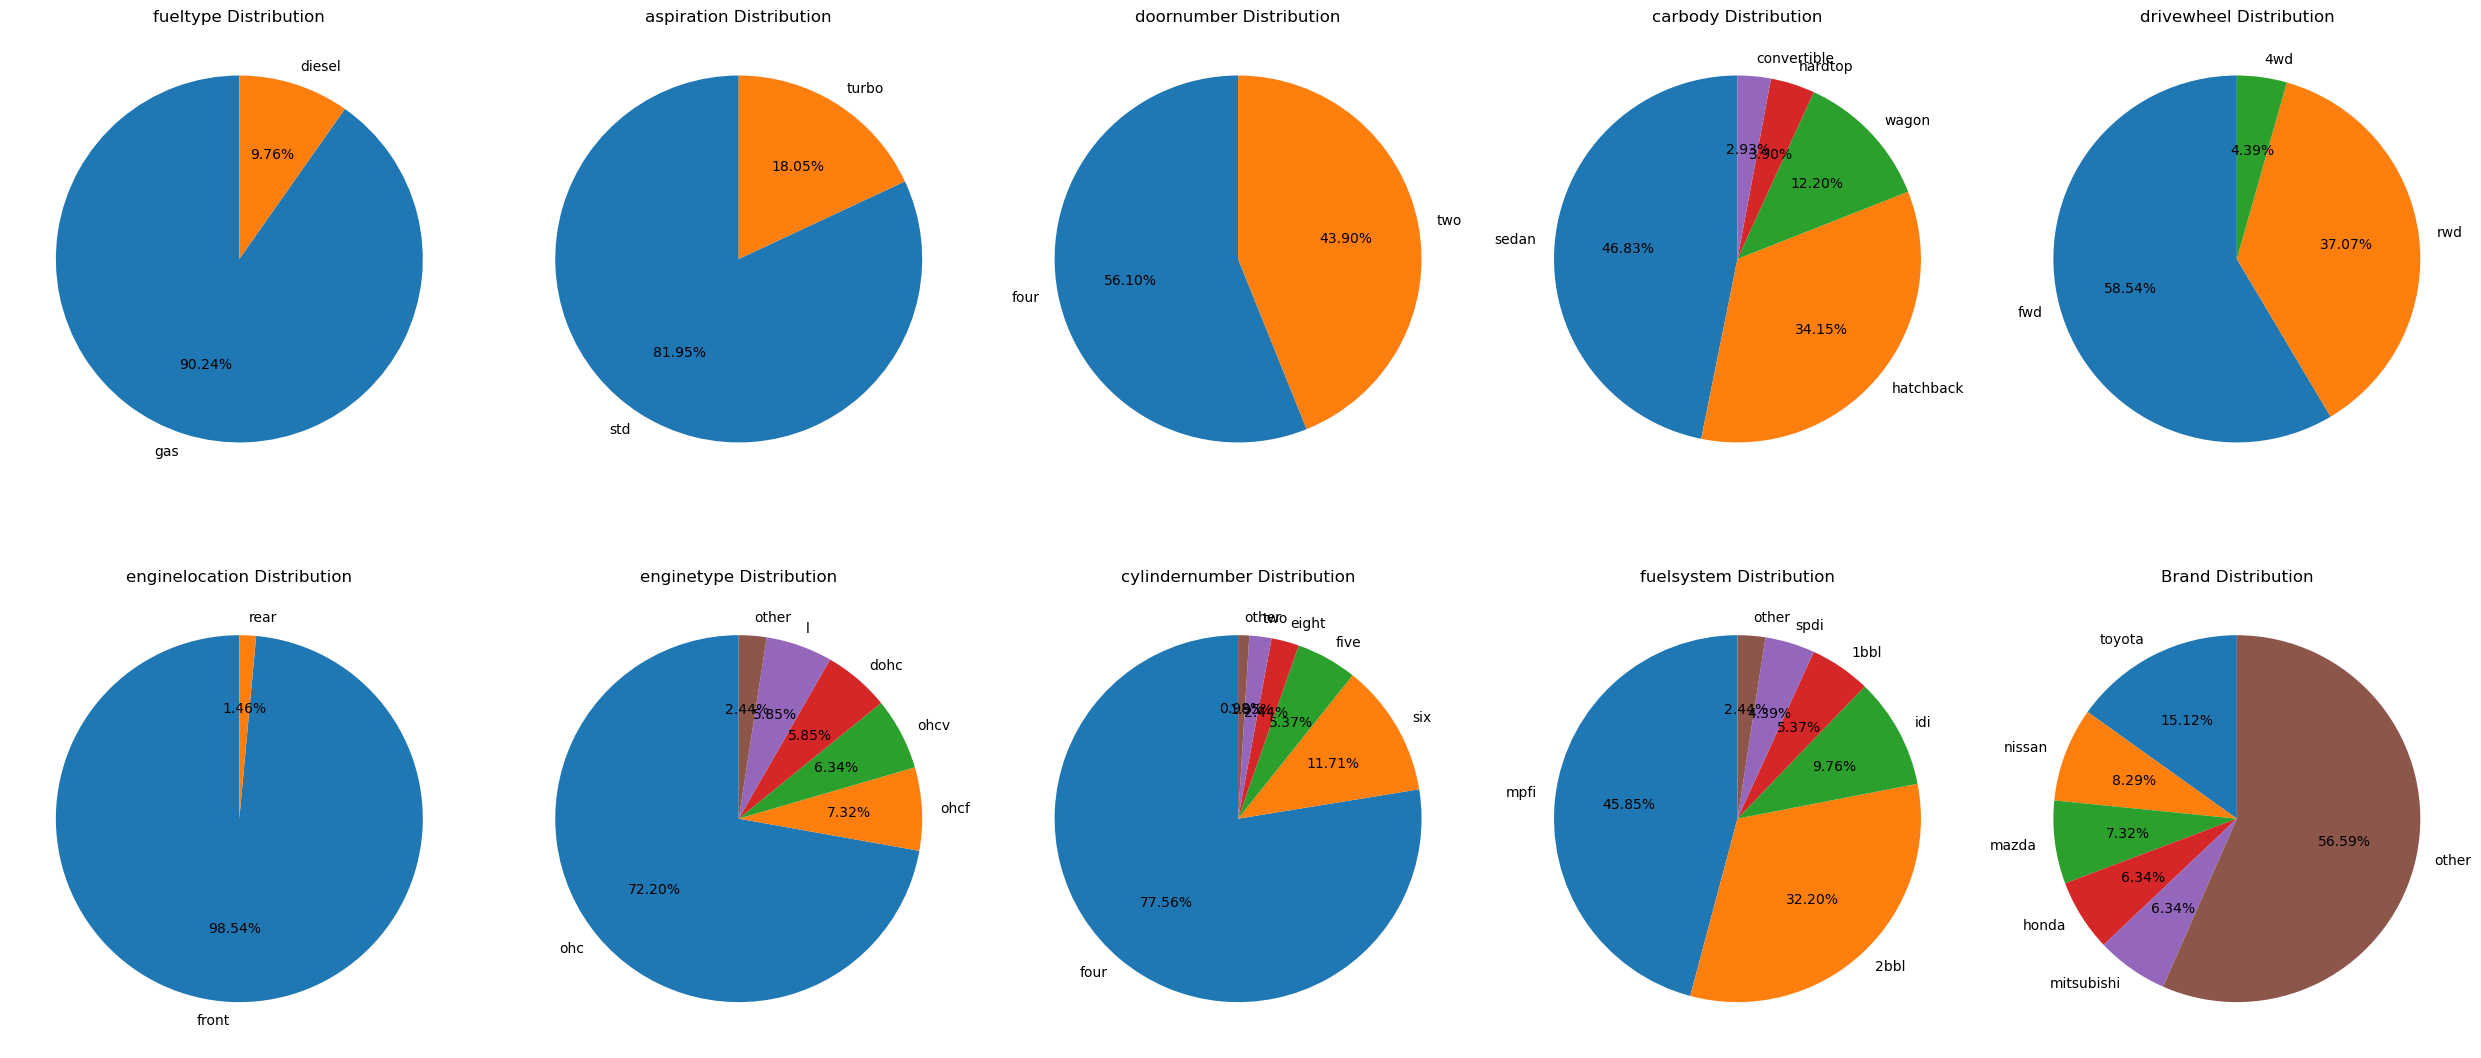

In [26]:
max_category=5
fig, axs=plt.subplots(nrows=2, ncols=5,figsize=(25,12))

for i, var in enumerate(categorical):
    
    cat_counts=cars[var].value_counts()

    if len(cat_counts)>max_category:
        cat_counts_top=cat_counts[:max_category]
        cat_counts_other=pd.Series(cat_counts[max_category:].sum(), index=['other'])
        cat_counts=cat_counts_top.append(cat_counts_other)

    axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.2f%%', startangle=90)
    axs.flat[i].set_title(f'{var} Distribution')
        
fig.tight_layout()
    
plt.show()

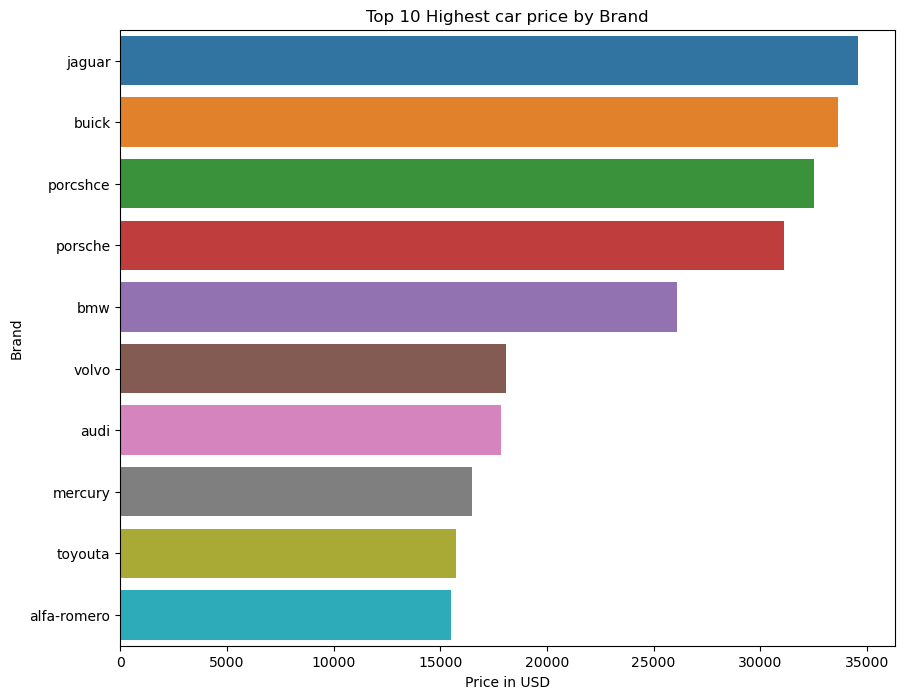

In [27]:
carsBrand=cars.groupby('Brand', as_index=False)['price'].mean()
carsBrand2=carsBrand.nlargest(10,'price')

plt.figure(figsize=(10,8))
sns.barplot(data=carsBrand2, x='price', y='Brand')
plt.title('Top 10 Highest car price by Brand')
plt.xlabel('Price in USD')
plt.ylabel('Brand')
plt.show()

In [28]:
values.sample(5)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
124,95.9,173.2,66.3,50.2,2818,156,3.59,3.86,7.0,145,5000,19,24,12764.0
97,94.5,170.2,63.8,53.5,2037,97,3.15,3.29,9.4,69,5200,31,37,7999.0
13,101.2,176.8,64.8,54.3,2765,164,3.31,3.19,9.0,121,4250,21,28,21105.0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [29]:
valuesList=list(values)
valuesList

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

#Two ways to use axs, one with flatten(1d) and one without it(2d).

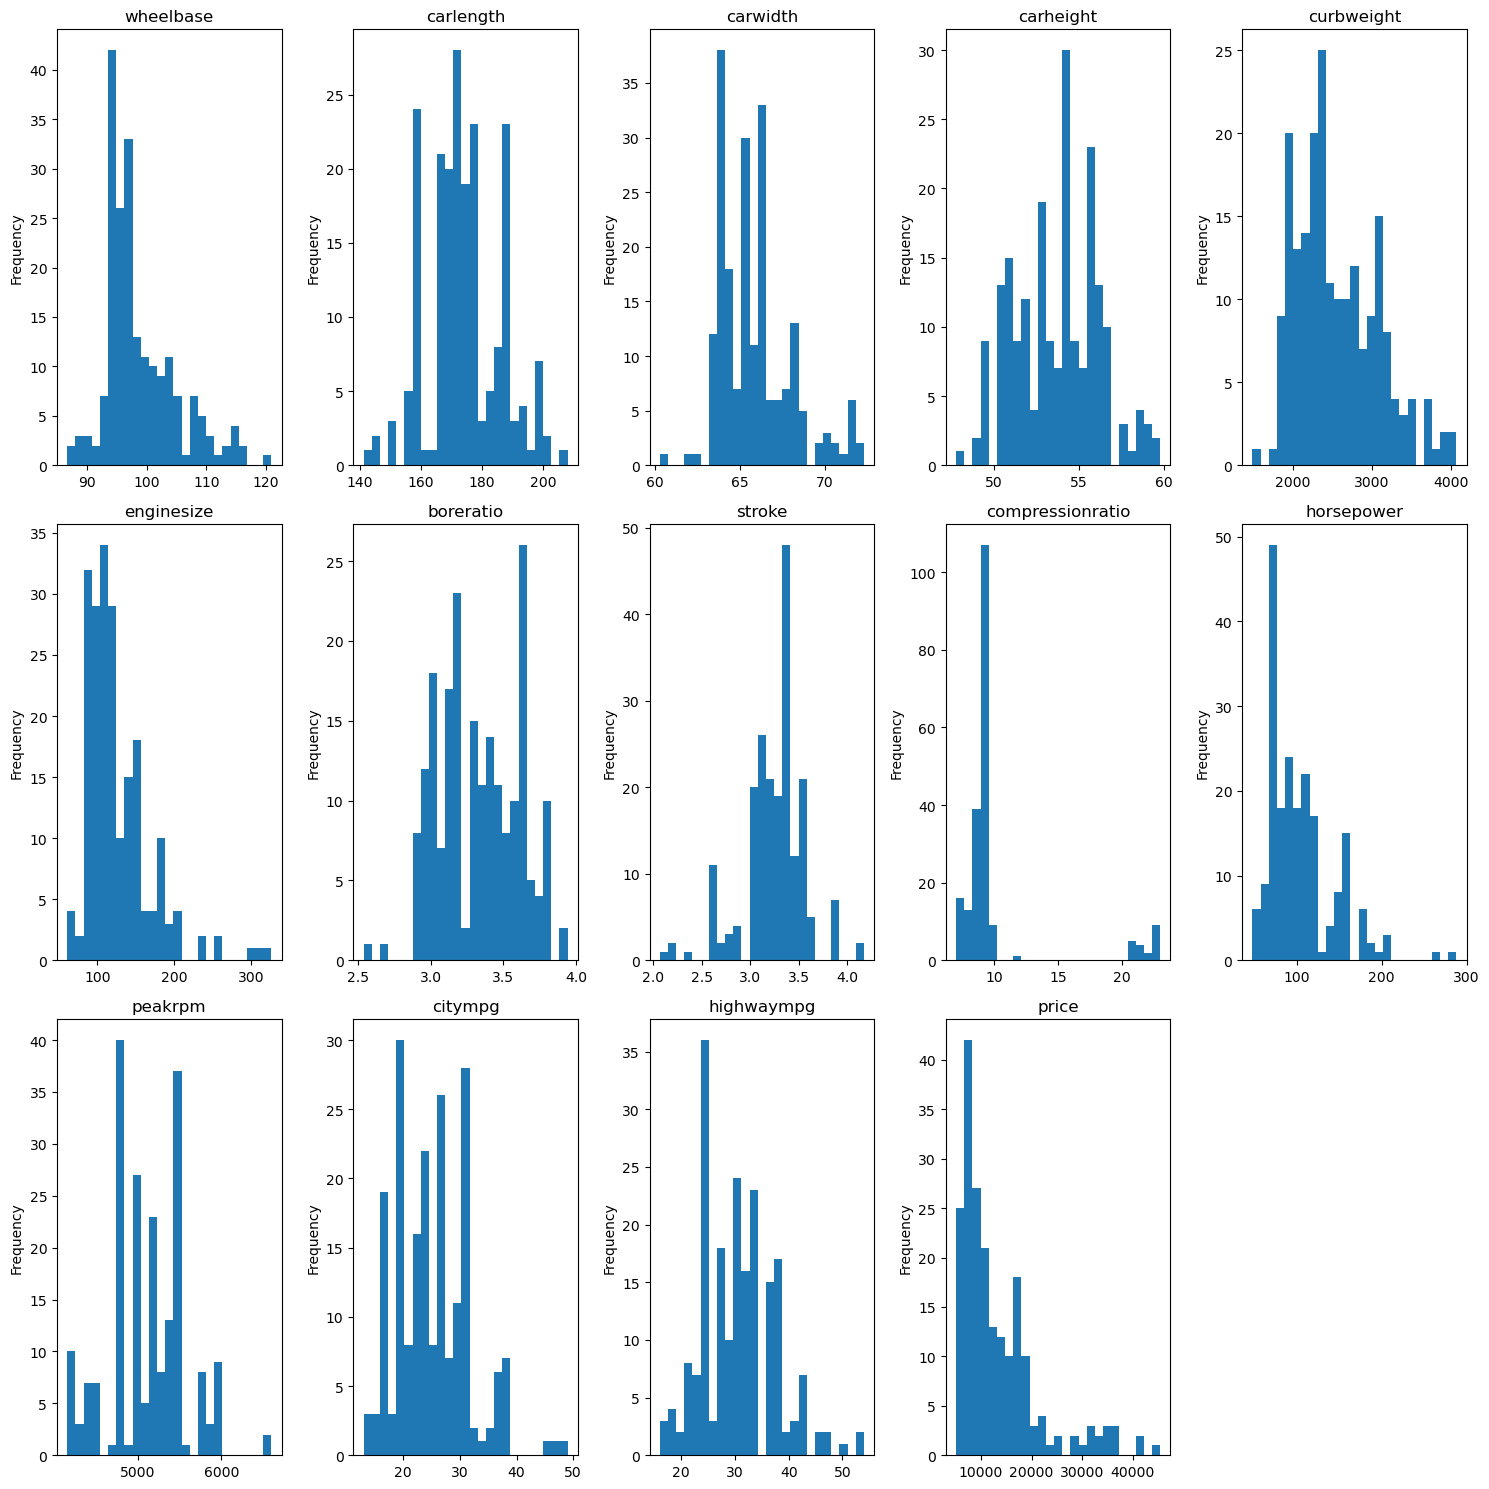

In [30]:
numRows=(len(valuesList)+4)//5
fig, axs=plt.subplots(nrows=numRows, ncols=5, figsize=(15, 5*numRows))
axs=axs.flatten()

for i, var in enumerate(valuesList):
    cars[var].plot.hist(ax=axs[i], bins=25)
    axs[i].set_title(var)
    
for i in range(len(valuesList), len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

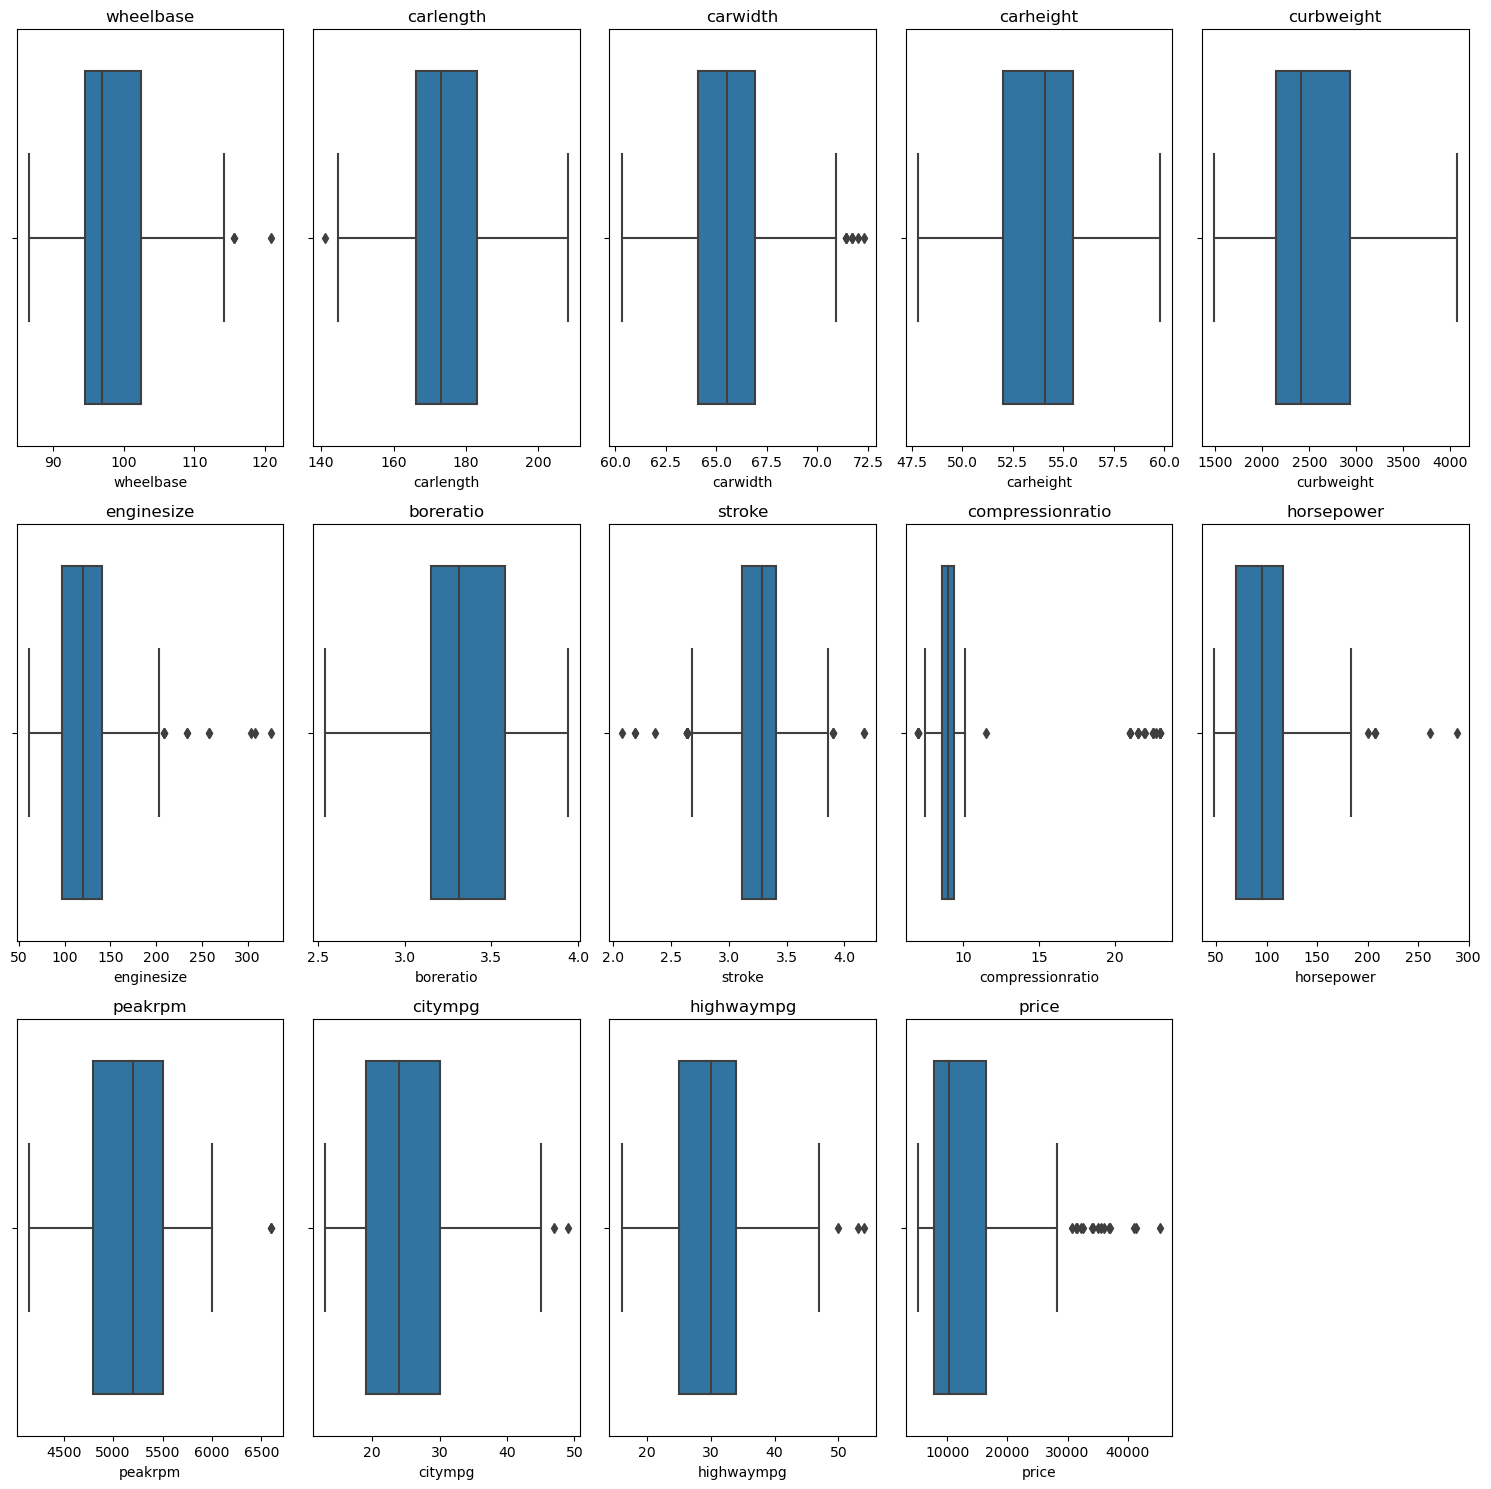

In [31]:
numRows=(len(valuesList)+4)//5
fig, axs=plt.subplots(nrows=numRows, ncols=5, figsize=(15, 5*numRows))
axs=axs.flatten()

for i, var in enumerate(valuesList):
    sns.boxplot(data=cars, x=var, ax=axs[i])
    axs[i].set_title(var)
    
for i in range(len(valuesList), len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

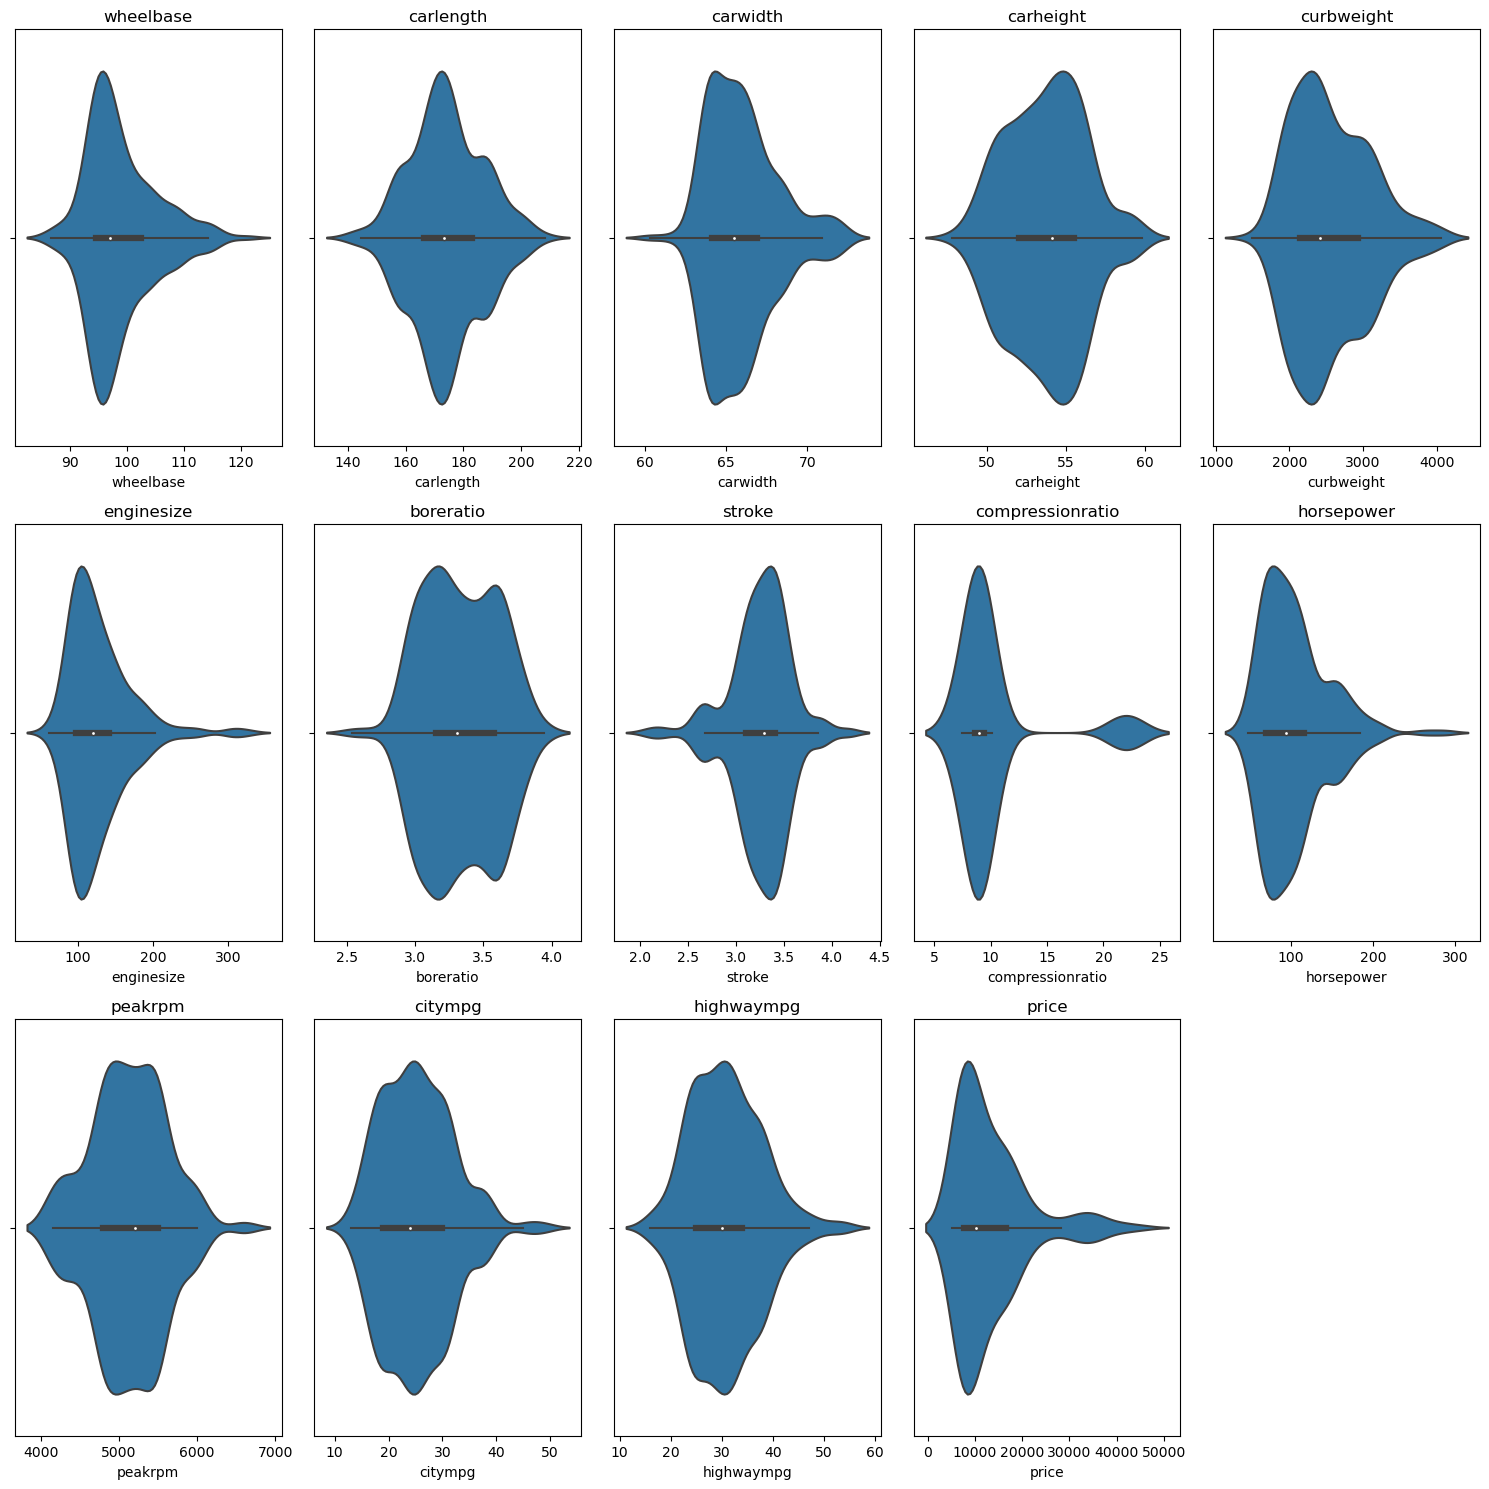

In [32]:
numRows=(len(valuesList)+4)//5
fig, axs=plt.subplots(nrows=numRows, ncols=5, figsize=(15, 5*numRows))
axs=axs.flatten()

for i, var in enumerate(valuesList):
    sns.violinplot(data=cars, x=var, ax=axs[i])
    axs[i].set_title(var)
    
for i in range(len(valuesList), len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

No Missing Value

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 10000x10000 with 0 Axes>

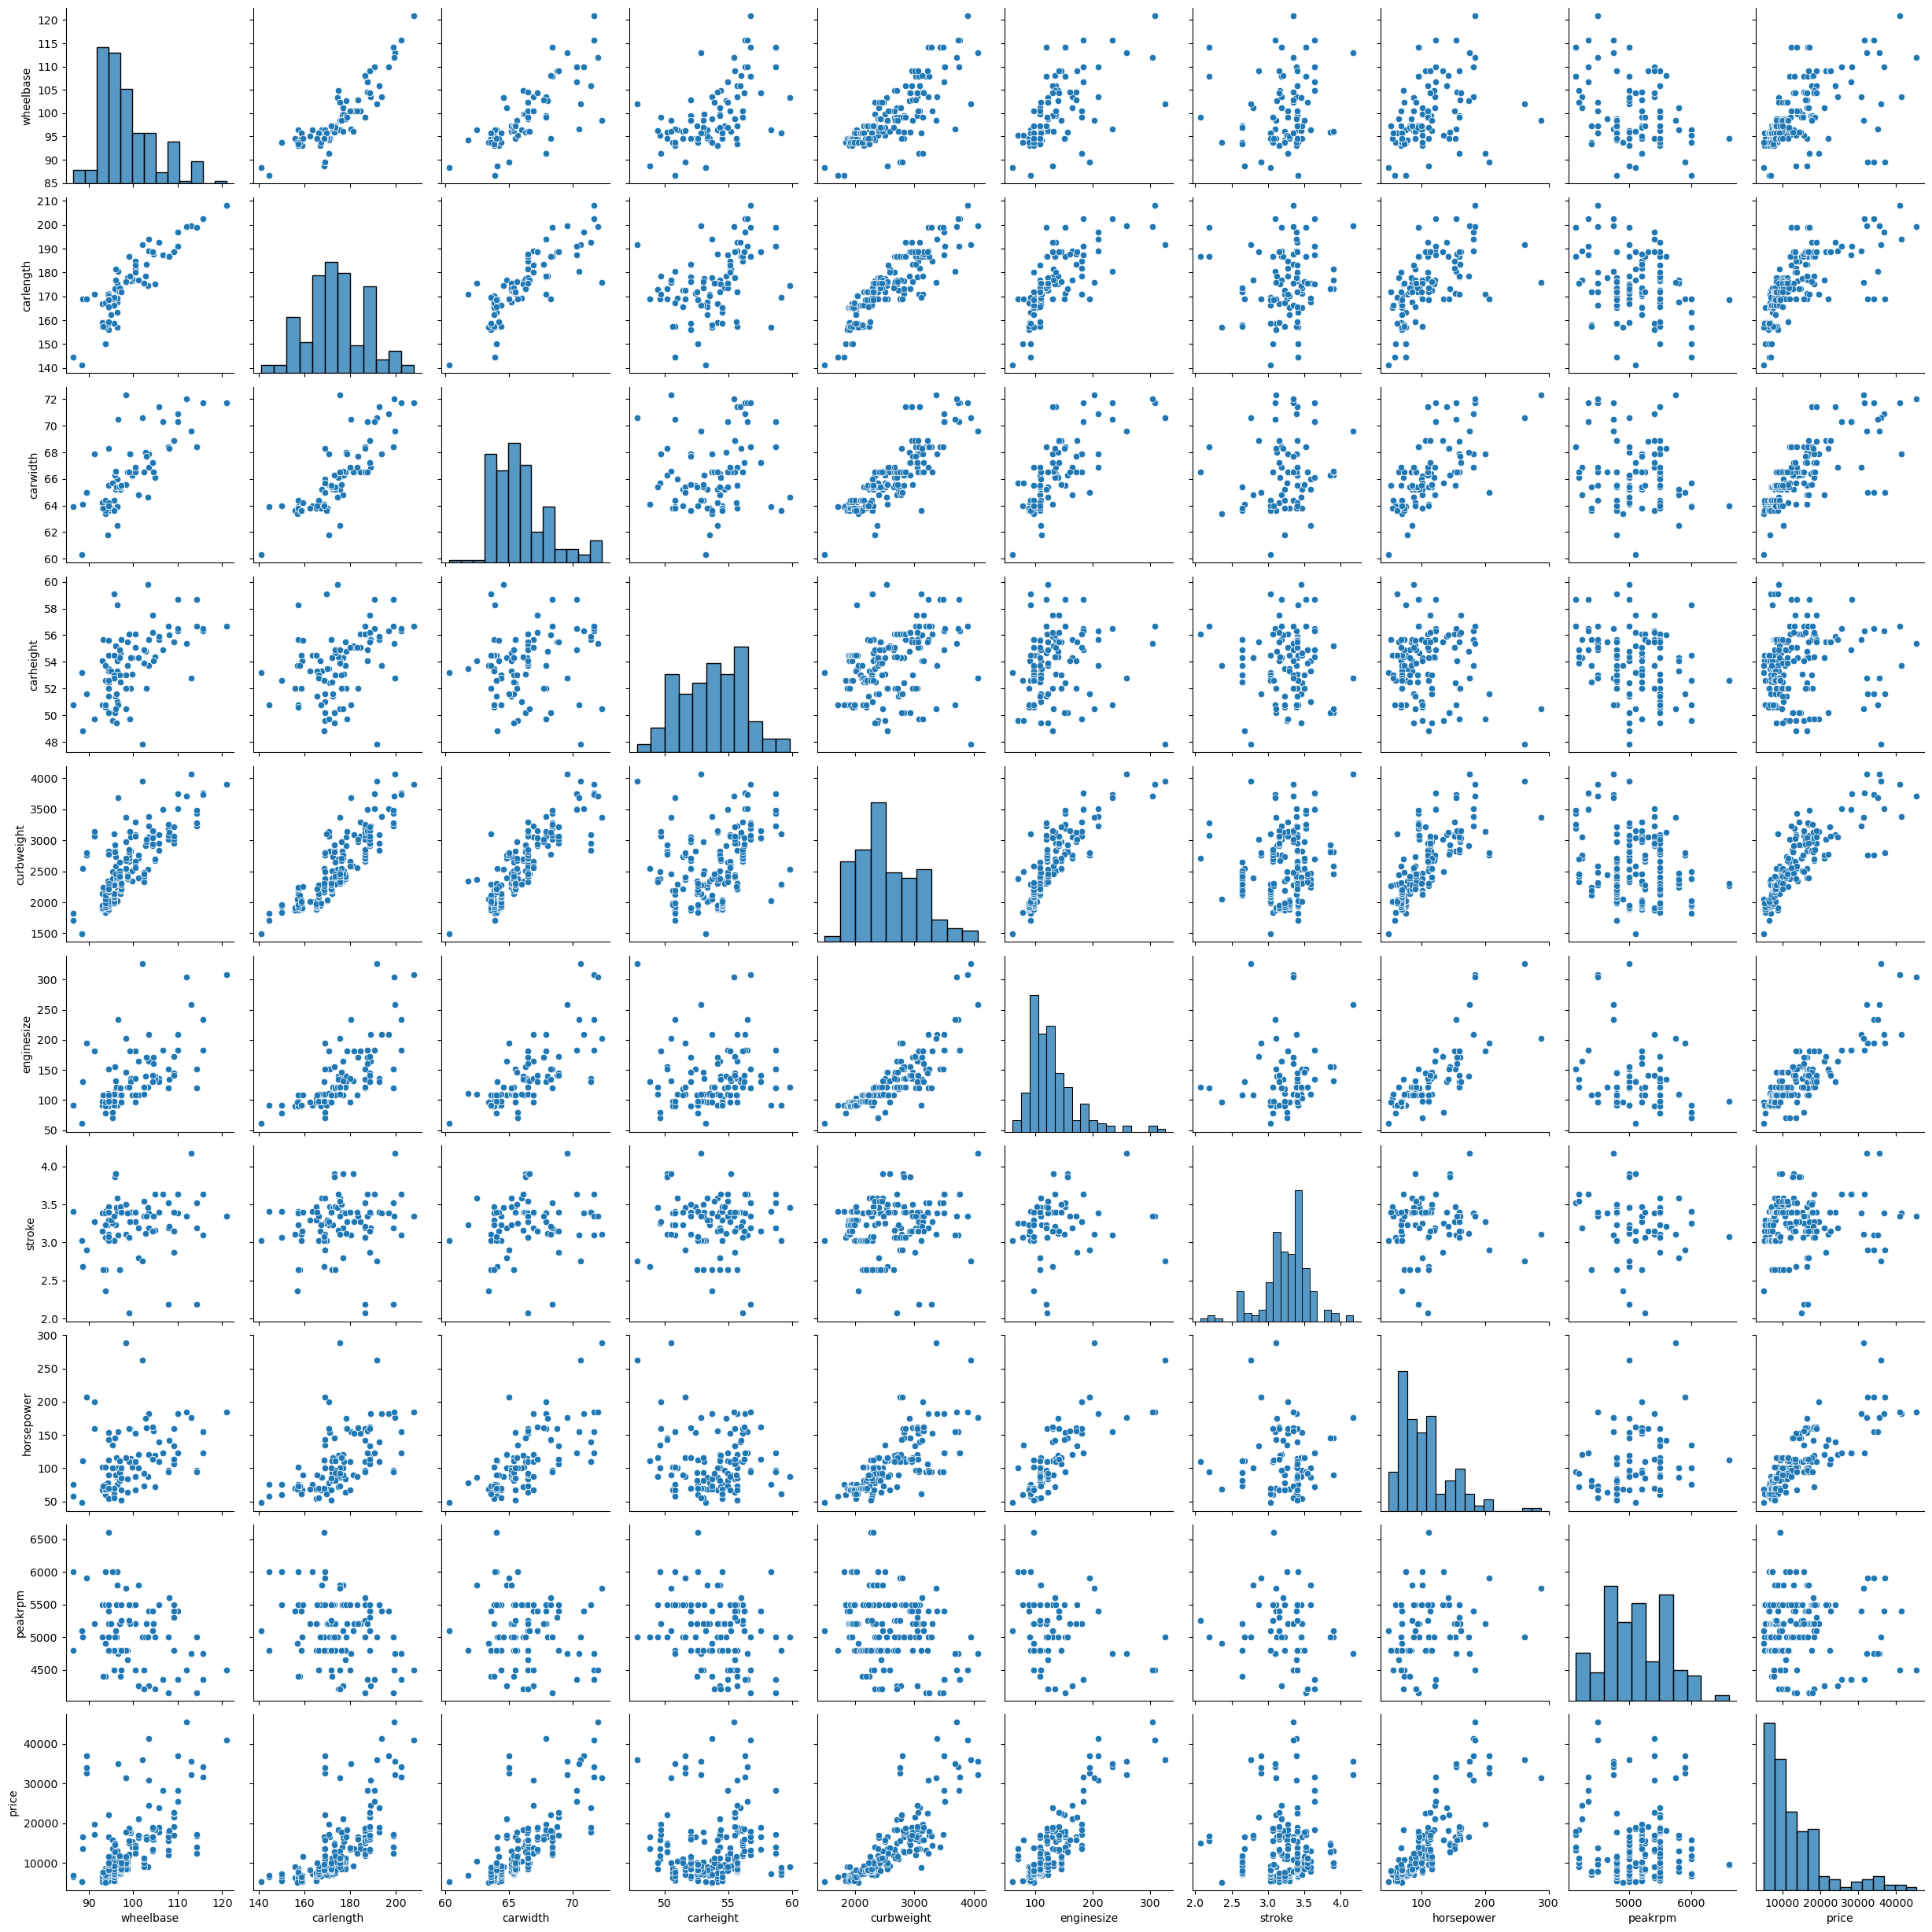

In [33]:
values1=values.drop(columns=['citympg', 'highwaympg', 'boreratio', 'compressionratio'])
plt.figure(figsize=(100,100))
sns.pairplot(data=values1)
plt.show()

In [34]:
check_missing=cars.isnull().sum()
check_missing[check_missing>0].sort_values(ascending=False)

Series([], dtype: int64)

In [35]:
for col in categorical:
    print(f'{col}: {cars[col].unique()}')

fueltype: ['gas' 'diesel']
aspiration: ['std' 'turbo']
doornumber: ['two' 'four']
carbody: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel: ['rwd' 'fwd' '4wd']
enginelocation: ['front' 'rear']
enginetype: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
Brand: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


Performing Machine Learning Alogrithms 

In [36]:
for col in categorical:
    labelEncoder=preprocessing.LabelEncoder()
    labelEncoder.fit(cars[col].unique())
    cars[col]=labelEncoder.transform(cars[col])
    
    print(f'{col}: {cars[col].unique()}')

fueltype: [1 0]
aspiration: [0 1]
doornumber: [1 0]
carbody: [0 2 3 4 1]
drivewheel: [2 1 0]
enginelocation: [0 1]
enginetype: [0 5 3 2 6 4 1]
cylindernumber: [2 3 1 4 5 6 0]
fuelsystem: [5 1 4 0 7 2 3 6]
Brand: [ 1  2  3  5  6  7  8  9 10 11  4 12 13  0 14 15 16 18 17 19 20 21 22 23
 24 25 27 26]


<Axes: >

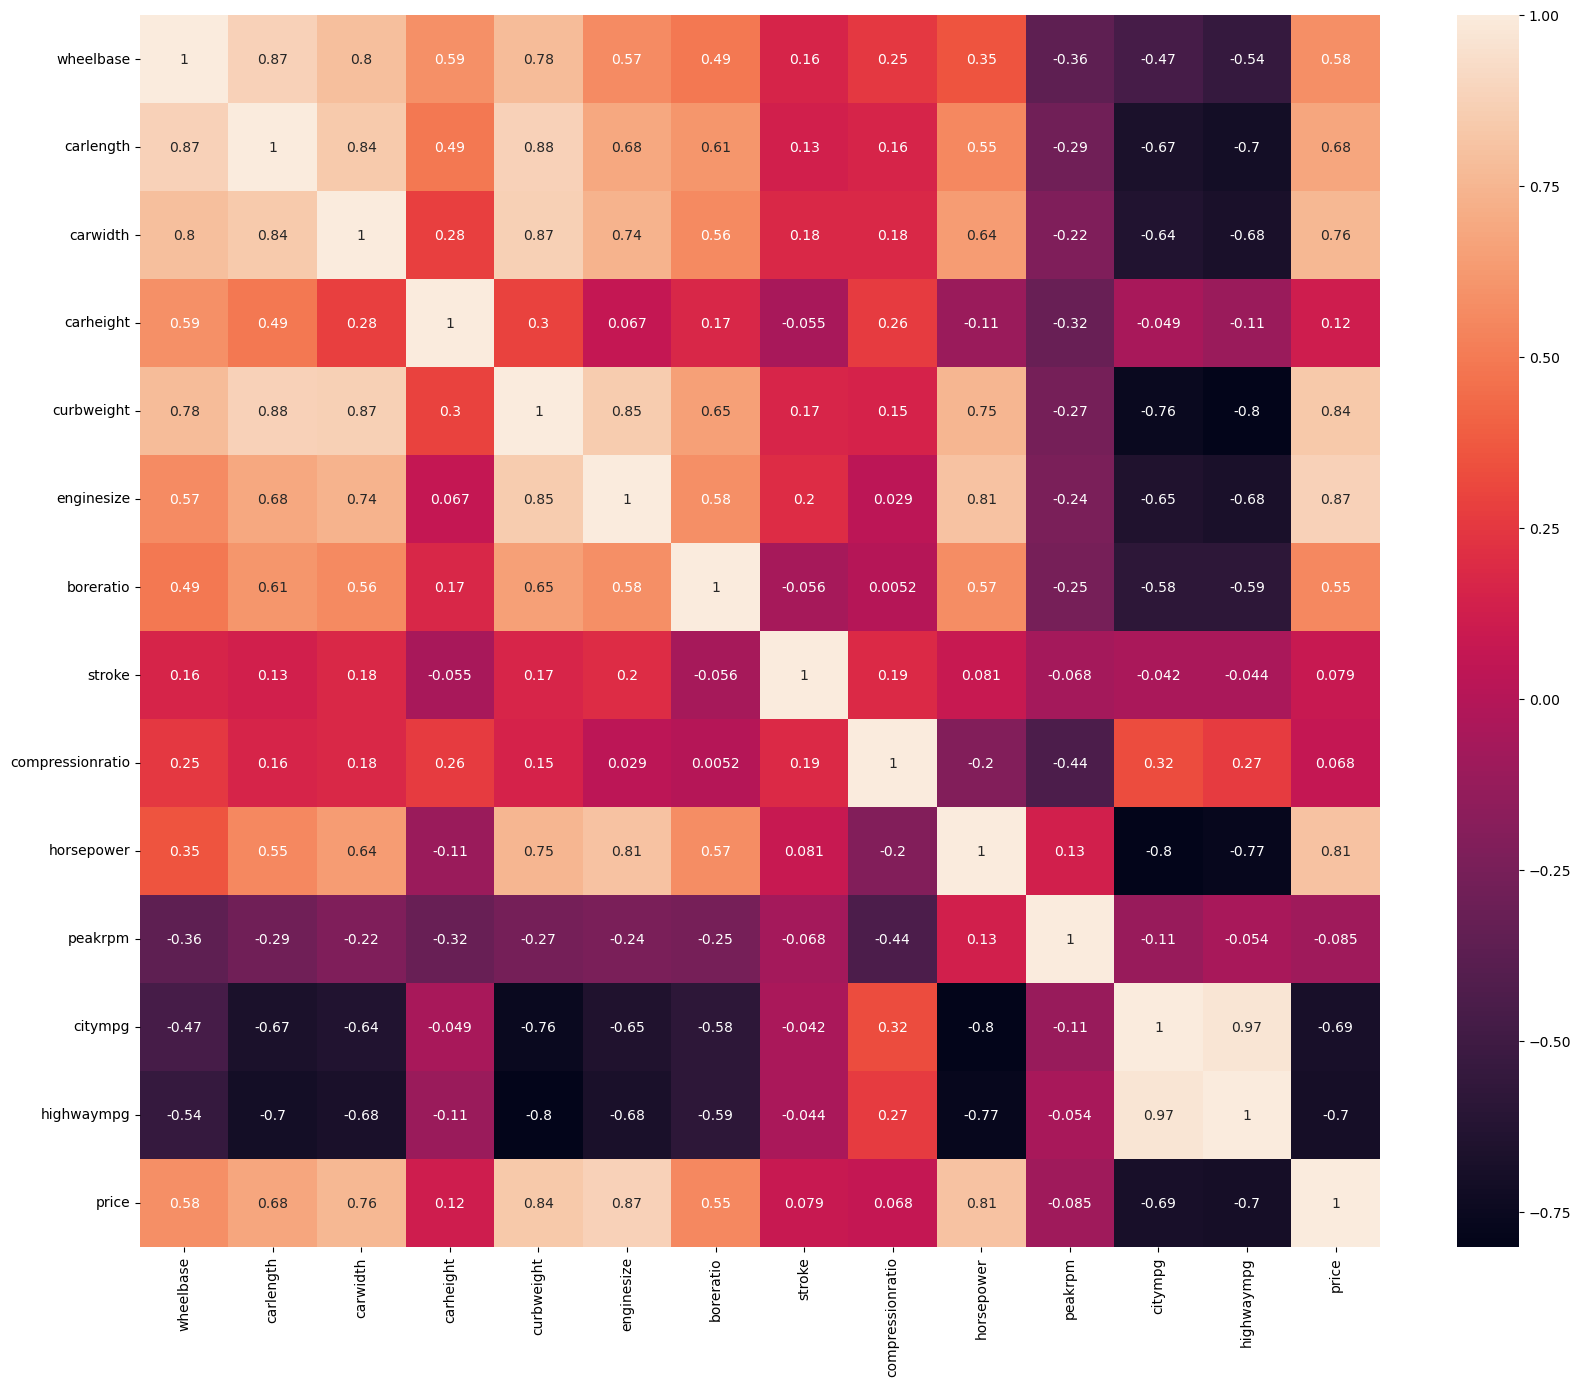

In [37]:
plt.figure(figsize=(20,16))
sns.heatmap(data=values.corr(), annot=True)

In [38]:
cars.sample(5)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
194,-2,1,0,0,3,2,0,104.3,188.8,67.2,...,5,3.78,3.15,9.5,114,5400,23,28,12940.0,26
74,1,1,0,1,1,2,0,112.0,199.2,72.0,...,5,3.80,3.35,8.0,184,4500,14,16,45400.0,4
149,0,1,1,0,4,0,0,96.9,173.6,65.4,...,5,3.62,2.64,7.7,111,4800,23,23,11694.0,21
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,1
166,1,1,0,1,2,2,0,94.5,168.7,64.0,...,5,3.24,3.08,9.4,112,6600,26,29,9538.0,22


In [39]:
X=cars.drop(columns=['symboling', 'price'])
y=cars[['price']]
X.sample(5)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,Brand
186,1,0,0,3,1,0,97.3,171.7,65.5,55.7,...,109,5,3.19,3.40,9.0,85,5250,27,34,25
38,1,0,1,2,1,0,96.5,167.5,65.2,53.3,...,110,0,3.15,3.58,9.0,86,5800,27,33,7
85,1,0,0,3,1,0,96.3,172.4,65.4,51.6,...,122,1,3.35,3.46,8.5,88,5000,25,32,13
12,1,0,1,3,2,0,101.2,176.8,64.8,54.3,...,164,5,3.31,3.19,9.0,121,4250,21,28,3
110,0,1,0,4,2,0,114.2,198.9,68.4,58.7,...,152,3,3.70,3.52,21.0,95,4150,25,25,15


In [40]:
y.sample(5)

,price
9,17859.167
45,8916.500
78,6669.000
141,7126.000
189,11595.000


In [41]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=0)

In [42]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_predicted=model.predict(X_test)
mse=mean_squared_error(y_true=y_test, y_pred=y_predicted)
r2=r2_score(y_true=y_test, y_pred=y_predicted)*100

In [44]:
print('Mean Squared Error: ', mse)
print('R Squared(accuracy): ', r2, '%')

Mean Squared Error:  11319182.676011125
R Squared(accuracy):  82.85942854465473 %


In [45]:
X.sample()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,Brand
71,1,0,0,3,2,0,115.6,202.6,71.7,56.5,...,234,5,3.46,3.1,8.3,155,4750,16,18,4


In [46]:
i=random.randint(0, 205)
cars_feature=X.iloc[i]
v=y.iloc[i][0]
v

8558.0

In [47]:
car_predicted_price=model.predict([cars_feature])
diff=car_predicted_price[0]-v
print('Predicted Price: ', car_predicted_price[0][0])
print('Differnce: ', diff[0])

Predicted Price:  8307.321610591527
Differnce:  -250.67838940847287


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Decision Tree Regressor

In [48]:
modelTree=DecisionTreeRegressor(max_depth=3, max_leaf_nodes=200)
modelTree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, max_leaf_nodes=200)

In [49]:
y_predicted=modelTree.predict(X_test)
mse2=mean_squared_error(y_true=y_test, y_pred=y_predicted)
r22=r2_score(y_true=y_test, y_pred=y_predicted)*100

In [50]:
print('Mean Squared Error: ', mse2)
print('R Squared(accuracy): ', r22, '%')

Mean Squared Error:  8272504.760416657
R Squared(accuracy):  87.47299491321805 %


In [51]:
car_predicted_price=model.predict([cars_feature])
diff2=car_predicted_price[0]-v
print('Predicted Price: ', car_predicted_price[0][0])
print('Differnce: ', diff2[0])

Predicted Price:  8307.321610591527
Differnce:  -250.67838940847287


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Random Forest Regressor

In [52]:
modelForest=RandomForestRegressor(max_depth=4, max_leaf_nodes=100)
modelForest.fit(X_train, y_train)

/tmp/ipykernel_20/3297631160.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelForest.fit(X_train, y_train)


RandomForestRegressor(max_depth=4, max_leaf_nodes=100)

In [53]:
y_predicted=modelTree.predict(X_test)
mse3=mean_squared_error(y_true=y_test, y_pred=y_predicted)
r23=r2_score(y_true=y_test, y_pred=y_predicted)*100

In [54]:
print('Mean Squared Error: ', mse3)
print('R Squared(accuracy): ', r23, '%')

Mean Squared Error:  8272504.760416657
R Squared(accuracy):  87.47299491321805 %


In [55]:
car_predicted_price=model.predict([cars_feature])
diff3=car_predicted_price[0]-v
print('Predicted Price: ', car_predicted_price[0][0])
print('Differnce: ', diff3[0])

Predicted Price:  8307.321610591527
Differnce:  -250.67838940847287


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Comparison, Linear Regression vs Decision Tree

In [56]:
print('MSE Diff: ', mse-mse2, " ", mse2-mse3)
print('Accuracy Diff: ', r2-r22, " ", r22-r23)
print('Outcome: ', diff[0]-diff2[0], " ", diff2[0]-diff3[0])

MSE Diff:  3046677.915594468   0.0
Accuracy Diff:  -4.613566368563312   0.0
Outcome:  0.0   0.0
